# 머신러닝   
       
6주 2강: 데이터 전처리 실습

## 데이터 전처리의 실습
### 머신러닝 프로세스와 데이터 전처리
* 개략적으로 (고전적인 방법은) 아래와 같은 흐름을 택합니다
  * 데이터를 확보한 후 데이터를 정제 및 전처리 
  * 학습용과 테스트 데이터를 나눠 학습용 데이터로 학습을 실시
  * 학습 결과를 평가 지표와 비교하여 하이퍼 매개변수 변환
  * 최종적인 모델 생성하여 테스트 데이터셋으로 성능을 측정
  ![W06/Figs/W06-fig2.jpg](W06/Figs/W06-fig2.jpg)
  

* 데이터 정제/데이터 전처리 단계는 실제로 가장 많은 시간이 들어가는 작업입니다... 슬프게도 
  * 일을 해 보면... 머신러닝 모델을 만드는 ‘ML Code’ 작업은 가장 작은 부분을 차지하고, 
  * 데이터 수집이나 피쳐 추출(Feature Extraction), 데이터 검증(Data Verification)이 훨씬 더 많은 부분을 차지하게 될 겁니다...

![W06/Figs/W06-fig3.png](W06/Figs/W06-fig3.png)


### 데이터 전처리 실습하기 : 타이타닉 생존자 예측하기
* 타이타닉 문제는 캐글(Kaggle)에 있는 많은 데이터 중 데이터 분석 입문자가 처음 사용하기 좋은 데이터입니다
  * 데이터가 기본적이면서 평가가 쉽습니다 (y가 많지 않습니다)
  * 타이타닉 문제는 배에 타고 있는 승객 대비 살아남을 수 있는 승객을 예측하는 모델로, ‘accuracy’ 지표를 씁니다
* https://www.kaggle.com/c/titanic [Data] 탭 - 왼쪽 하단 [Download All] 버튼으로 받을 수 있습니다
* 강의노트에는 data 폴더 안에 test_w06.csv / train_w06.csv로 저장하게 되어있습니다

* 저장하면 아래와 같은 파일이 나옵니다
* ‘titanic.zip’ 파일의 압축을 풀면
  * gender_submission.csv : 데이터 제출 예제 파일로 캐글에 제출하여 평가를 받을 파일의 예시
  * test.csv : 예측되는 탑승객들의 데이터가 있는 파일
  * train.csv : 모델을 학습시키기 위한 데이터가 있는 파일
* 프로세스 요약
  * ‘train.csv’ 파일 데이터를 사용하여 모델을 만들고 
  * 모델을 ‘test.csv’ 데이터에 적용하여 
  * 결과를 ‘gender_submission.csv’ 파일 형태로 제출

* ‘train.csv’ 파일과 달리 ‘test.csv’ 파일에는 y 값, 즉 탑승객의 생존 유무에 대한 열이 없습니다
  * 예측을 해야합니다
  
  ![](W06/Figs/W06-fig4.jpg)

In [21]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

DATA_DIR = 'W06'
os.listdir(DATA_DIR)

['Figs', 'test_w06.csv', 'train_w06.csv', '.ipynb_checkpoints']

In [22]:
DATA_DIR = 'W06'
data_files = sorted(glob.glob(DATA_DIR+"/*.csv"), reverse=True) 
# glob는 특정 형태의 파일의 리스트를 불러오는 함수입니다 
# 교과서 코드가 좀 비효율적이라 바꿨습니다 (os.listdir...)
data_files

['W06/train_w06.csv', 'W06/test_w06.csv']

In [23]:
# (1) 데이터프레임을 각 파일에서 읽어온 후 df_list에 추가
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))
    
# (2) 두 개의 데이터프레임을 하나로 통합
df = pd.concat(df_list, sort=False)

# (3) 인덱스 초기화
df = df.reset_index(drop=True)

# (4) 결과 출력
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.00,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1.00,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1.00,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1.00,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0.00,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [24]:
# (1) train.csv 데이터의 수
number_of_train_dataset = df.Survived.notnull().sum()

# (2) test.csv 데이터의 수
number_of_test_dataset = df.Survived.isnull().sum()

# (3) train.csv 데이터의 y 값 추출
y_true = df.pop("Survived")[:number_of_train_dataset]

* 각 Feature는 아래같은 의미를 가집니다 

![](W06/Figs/W06-fig5.jpg)

### 데이터 노트 작성하기
* 데이터 노트 : 분석해야 하는 데이터에 대한 여러 가지 아이디어를 정리하는 노트
  * 꼭 해야 하는 것은 아닙니다. 하지만 저도 일을 할 때 손으로 무언가 정리해두는 것이 나중에 편하긴 하더라구요
* 각 데이터의 현재 데이터 타입 올바르게 정의
* 숫자로 표시되어 있지만 범주형 데이터로 변형이 필요한 경우 등을 표현

![](W06/Figs/W06-fig6.jpg)

In [25]:
# 첫 2줄만 Transpose 해서 봅시다
# transpose 함수는 데이터를 가로로 한 줄씩 보여줘 안에 있는 값들을 확인하기 좋습니다
df.head(2).T

,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.00,38.00
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.28
Cabin,NaN,C85


### 결측치 확인하기
* 열별로 결측치가 얼마나 되는지 체크해서 결측치를 채우는 전략을 생각해봅시다

In [26]:
# (1) 데이터를 소수점 두 번째 자리까지 출력
pd.options.display.float_format = '{:.2f}'.format

# (2) 결측치 값의 합을 데이터의 개수로 나눠 비율로 출력
df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           20.09
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

* 데이터를 삭제할지 전략적으로 생각해 보고
* 결측치를 어떻게 채울지 결정해봅시다

In [27]:
# 성별별로 나이 평균을 보거나
df[df["Age"].notnull()].groupby(
    ["Sex"])["Age"].mean()

Sex
female   28.69
male     30.59
Name: Age, dtype: float64

In [28]:
# 타고 있는 선실의 등급별로 보거나!
df[df["Age"].notnull()].groupby(
    ["Pclass"])["Age"].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [29]:
# 없는 경우는 선실의 등급에 맞추어서 평균 나이를 내 봅시다
# 일단 부자인 경우(=높은 등급 선실에 타는 경우)가 나이가 더 많은 경향이 있네요 
# 이게 정답은 아닙니다
df["Age"] = df["Age"].fillna(df.groupby("Pclass")["Age"].transform("mean"))
# 원래 강의노트는 교과서대로 inplace로 했습니다만... inplace는 좋은 작동 방식이 아니므로...

df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [30]:
df[df["Embarked"].isnull()]
# Embarked는 몇 개 안되니 눈으로 봅시다

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.00,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.00,B28,NaN


In [31]:
# 일단은 S로 채우겠습니다.
df.loc[61,"Embarked"] = "S"
df.loc[829,"Embarked"] = "S"

### 범주형 데이터 처리 : 원핫인코딩
* 데이터 형태에 따라 처리 방법을 결정합시다
  * df.info() 함수 : 열별로 데이터 타입을 확인
  * 열별로 문자열 리스트 타입으로 정리

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [34]:
# 데이터의 타입을 정리해 봅시다
object_columns = ["PassengerId", "Pclass", "Name", "Sex",
                  "Ticket", "Cabin", "Embarked"]
numeric_columns = ["Age", "SibSp", "Parch", "Fare"]

for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)
    
for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)
    
df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)

In [35]:
# 데이터를 원핫인코딩으로 처리하는 함수를 만들고
def merge_and_get(ldf, rdf, on, how="inner", index=None):
    if index is True:
        return pd.merge(ldf,rdf, how=how, left_index=True,
                        right_index=True)
    else:
        return pd.merge(ldf,rdf, how=how, on=on)

In [38]:
# 실제로 돌려봅시다
one_hot_df = merge_and_get(
    df, pd.get_dummies(df["Sex"], prefix="Sex"), on=None, index=True)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(
        df["Pclass"], prefix="Pclass"), on=None, index=True)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(
        df["Embarked"], prefix="Embarked"), on=None, index=True)

# display(one_hot_df)

### 데이터 시각화 진행하기
* y 값과 각 범주형 타입 간에 어떤 관계가 있는지를 확인해 봅시다
* 열별로 y_true 데이터와 합쳐서 비교 그래프로 나타내어 각 열이 생존 여부에 영향을 주는지 시각적으로 확인해 봅시다
  * 데이터 유형별로 y_true 데이터의 분포 변화가 있는가

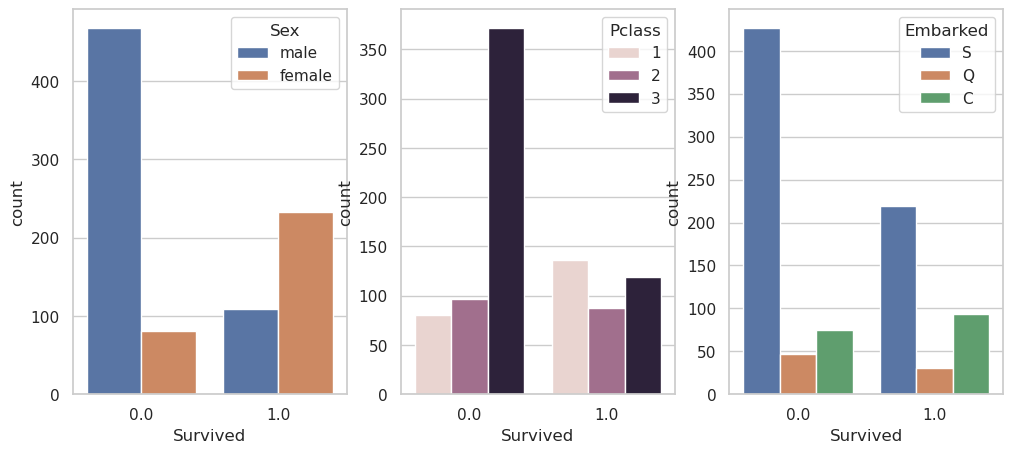

In [39]:
# 일단 3가지를 먼저 봅시다
temp_columns = ["Sex", "Pclass", "Embarked"]
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig

for i, col_name in enumerate(temp_columns):
    temp_df = pd.merge(
        one_hot_df[col_name], y_true, left_index=True, right_index=True)
    sns.countplot(x="Survived", hue=col_name, data=temp_df, ax=axs[i])
    
plt.show()

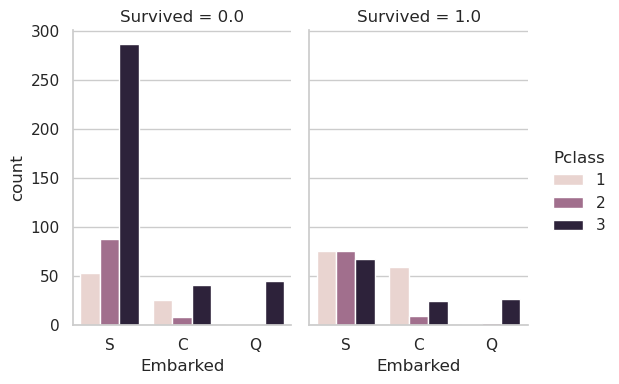

In [40]:
# 범주형 데이터간의 상관관계도 한 번 봅시다
temp_df = pd.merge(one_hot_df[temp_columns],
                   y_true, left_index=True,
                   right_index=True)
g = sns.catplot(x="Embarked",
                hue="Pclass",
                col="Survived",
                data=temp_df,
                kind="count",
                height=4, aspect=.7);
g.tight_layout()

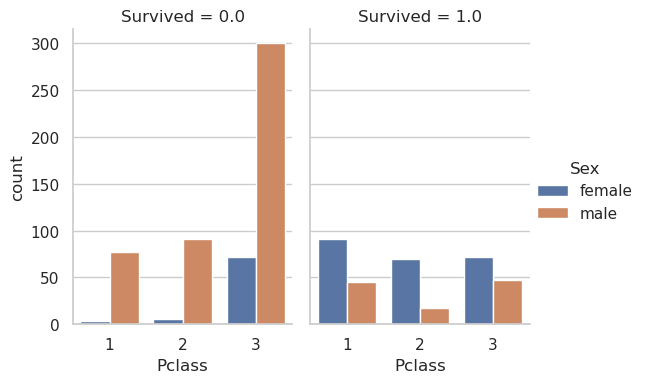

In [41]:
temp_df = pd.merge(
    one_hot_df[temp_columns],
    y_true, left_index=True,
    right_index=True)
g = sns.catplot(x="Pclass",
                hue="Sex", col="Survived",
                data=temp_df, kind="count",
                height=4, aspect=.7)

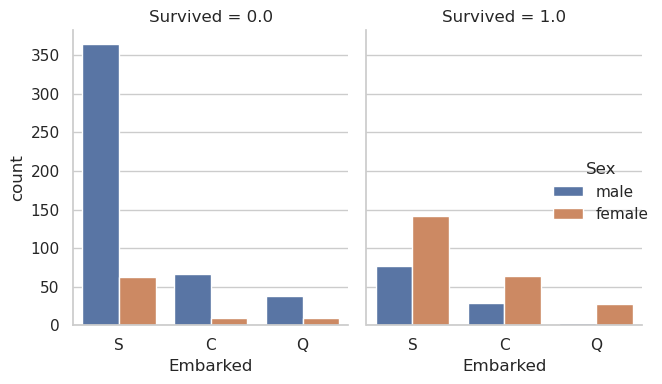

In [42]:
temp_df = pd.merge(
    one_hot_df[temp_columns],
    y_true, left_index=True,
    right_index=True)

g = sns.catplot(
    x="Embarked", hue="Sex",
    col="Survived",
    data=temp_df, kind="count",
    height=4, aspect=.7);
plt.tight_layout()

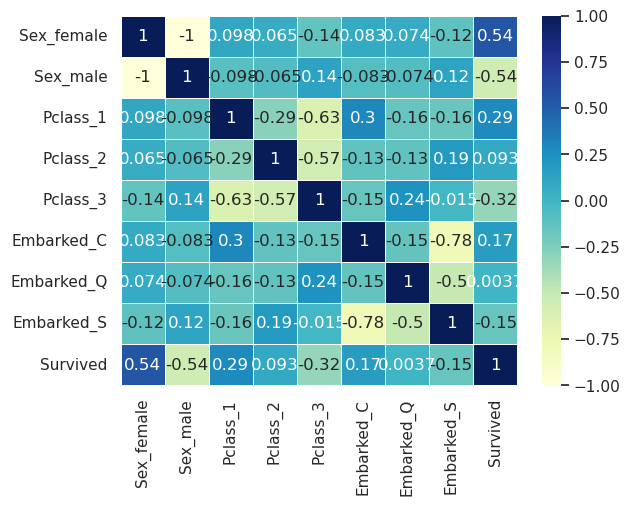

In [43]:
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
if col_name.split("_")[0] in temp_columns and "_" in col_name ]

# temp열
temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true,
                   left_index=True, right_index=True)

corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")

# Today
- 실제로 전처리를 해 봅시다: 타이타닉 생존자 데이터!
 

# Next class
- "선형 회귀"를 이야기해 봅시다